# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers
from utils.data_manipulation import data_split

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

# esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.157507,1.426839,-0.469496,0.631172,0.141224,32.955771
1,0.360346,0.664989,0.596357,-1.111283,-0.612975,35.662871
2,-0.082215,0.297242,-0.243246,0.903090,-0.832547,4.552928
3,0.884504,2.253242,-1.025295,0.207260,-1.370701,105.089003
4,-0.508533,-1.099565,1.632185,0.275791,-1.320263,-54.882327


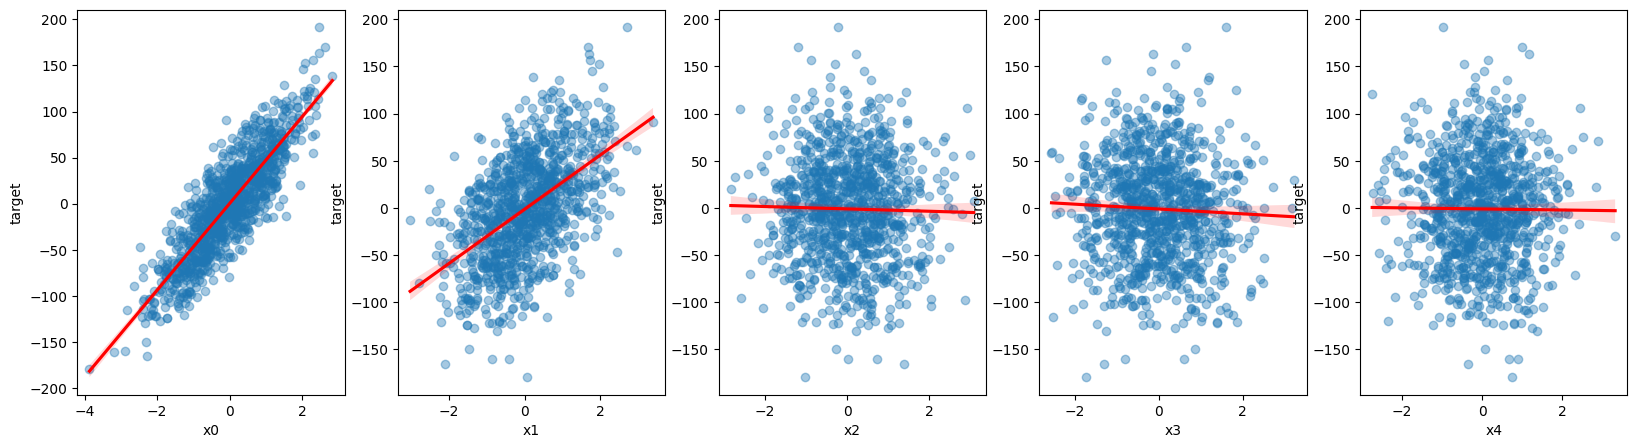

In [4]:
# vamos a visualizar estas variables
# creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)

Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

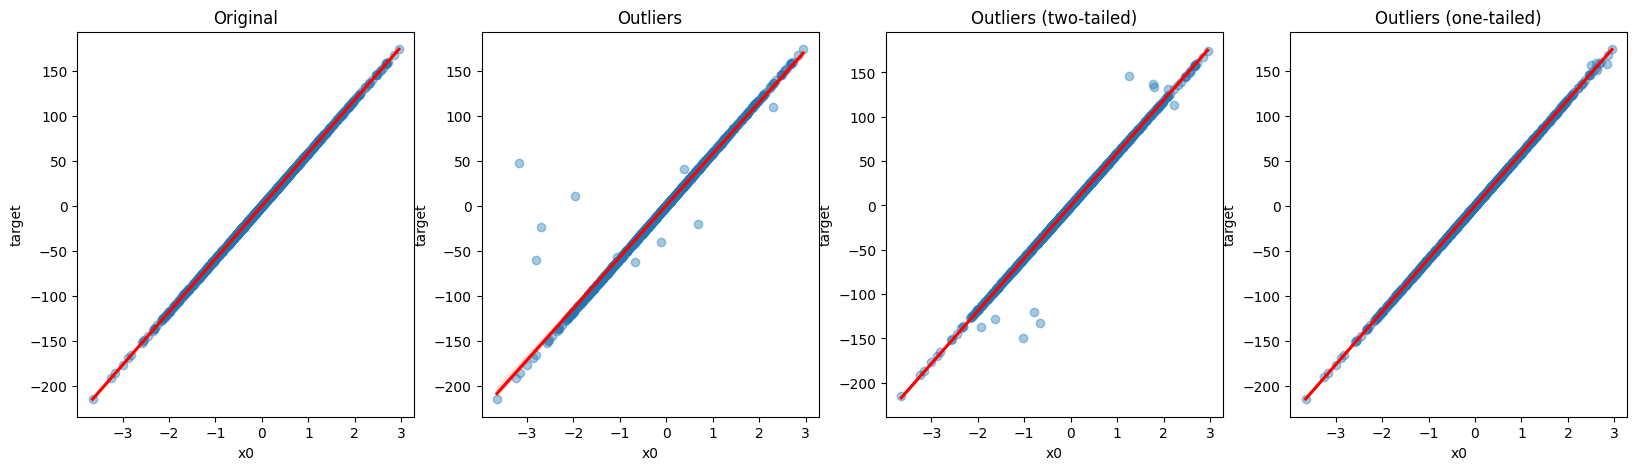

In [7]:
# vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')

Text(0.5, 1.0, 'Outliers')

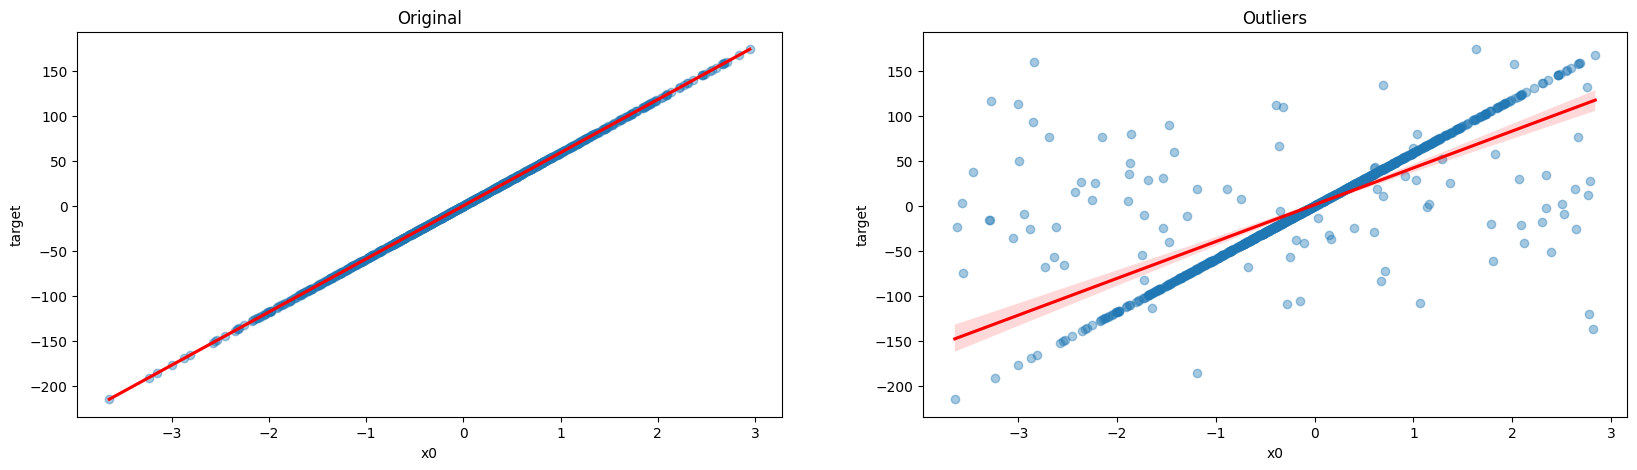

In [8]:
# y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

# vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
from tqdm import tqdm

In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

#### Ejemplo para un solo conjunto de datos

In [11]:
data = generate_dataset(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_targets=1,
    noise=1,
    bias=2,
    output='dataframe'
)

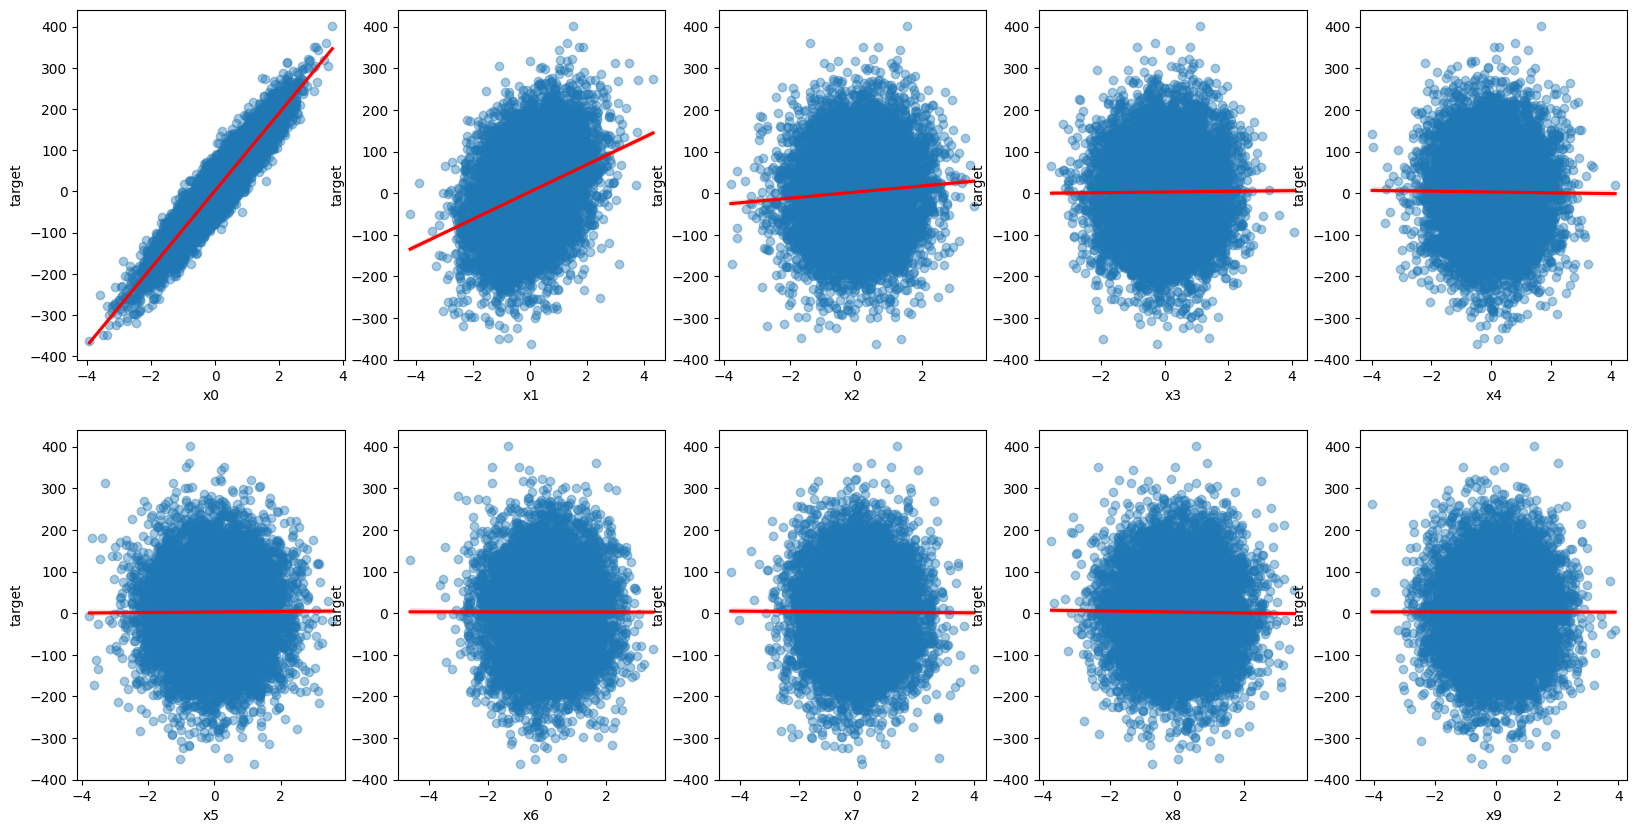

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i // 5, i % 5],  # Usamos integer division y el residuo para obtener las coordenadas correctas del subplot
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)

plt.show()

In [13]:
# Dividir datos
X = np.column_stack((np.ones(data.shape[0]), np.array(data.drop('target', axis=1).values)))
y = np.array(data['target'])

X_train, _, X_test, y_train, _, y_test = data_split(
    X, y, val_size=0, test_size=0.2, shuffle=True)
print("X_train: {} | X_test: {} | y_train: {} | y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (8000, 11) | X_test: (2000, 11) | y_train: (8000,) | y_test: (2000,)


In [14]:
# Ajustar regresion lineal
betas = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Predecir en train y test
y_train_pred = X_train.dot(betas)
y_test_pred = X_test.dot(betas)

# Calcular y mostrar errores
rmse_train = rmse(y_train, y_train_pred)
rmse_test = rmse(y_test, y_test_pred)
mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

np.set_printoptions(precision=2)
print("Coeficientes de la regresión:", betas)
print("RMSE_train: {:.2f} | RMSE_test: {:.2f}\nMAE_train: {:.2f} | MAE_test: {:.2f}".format(
    rmse_train, rmse_test, mae_train, mae_test))
np.set_printoptions(precision=None)

Coeficientes de la regresión: [ 2.00e+00  9.36e+01  3.13e+01  6.12e+00  7.31e-03  1.51e-02 -7.59e-03
  1.01e-02 -1.42e-02  7.16e-04 -4.92e-03]
RMSE_train: 1.01 | RMSE_test: 1.01
MAE_train: 0.80 | MAE_test: 0.81


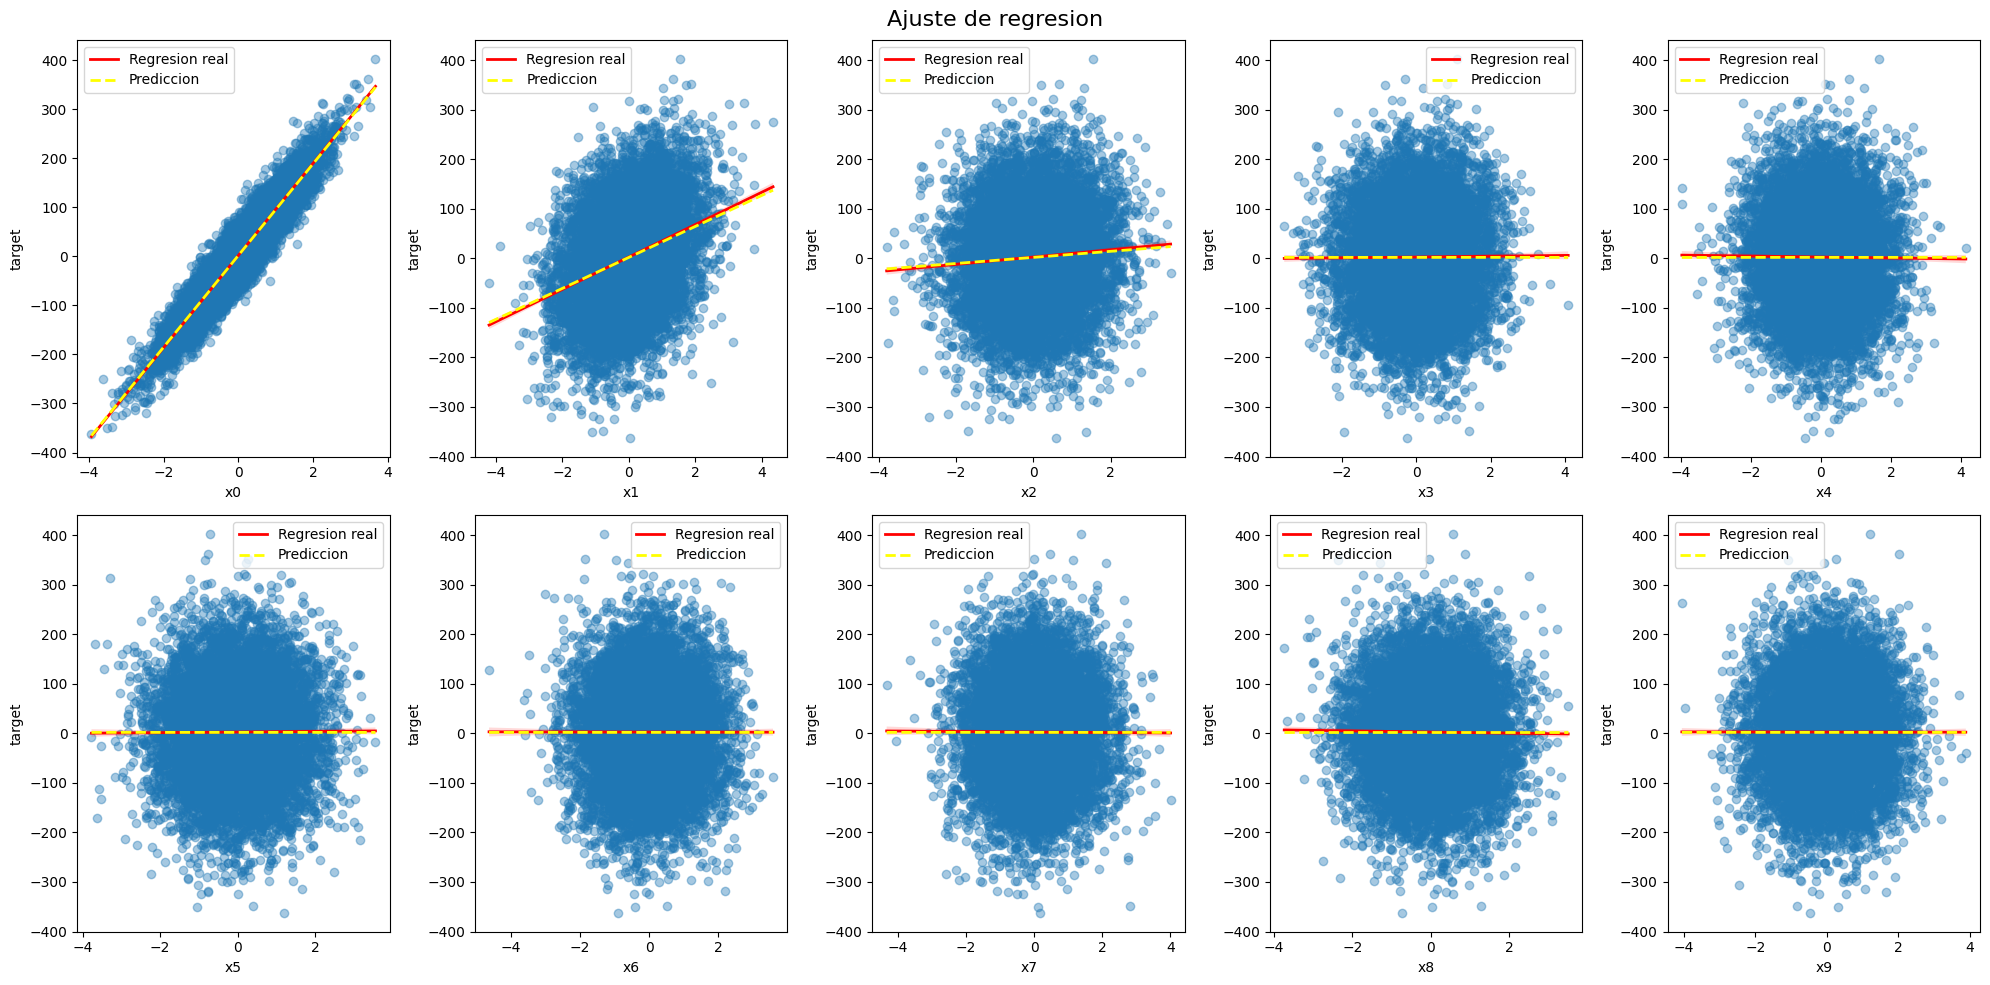

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Ajuste de regresion", fontsize=16)

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i // 5, i % 5],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regresion real'},
                ci=95)

    x_line = np.linspace(data[feature].min(), data[feature].max(), 100)
    y_line = betas[0] + betas[i + 1] * x_line
    axes[i // 5, i % 5].plot(x_line, y_line, color='yellow', linestyle='dashed', linewidth=2, label='Prediccion')

    axes[i // 5, i % 5].set_xlabel(feature)
    axes[i // 5, i % 5].set_ylabel('target')
    axes[i // 5, i % 5].legend()

plt.tight_layout()
plt.show()


#### Regresion lineal con numpy

In [16]:
# Parámetros de la simulación
# n_exp = 100
# n_samples = 10000
# n_features = 10
# n_informative = 3
# n_targets = 1
# noise=[0,1,2]   # noise = np.linspace(0, 100, 100)
# bias=[0,5,10]   # bias = np.linspace(0, 100, 20)

In [17]:
# betas_output = []
# rmse_train_output = []
# rmse_test_output = []
# mae_train_output = []
# mae_test_output = []

# # Esqueleto de la simulación
# for _ in tqdm(range(n_exp)):
#     for b in bias:
#         for n in noise:
#             data = generate_dataset(
#                 n_samples=n_samples,
#                 n_features=n_features,
#                 n_informative=n_informative,
#                 n_targets=n_targets,
#                 noise=n,
#                 bias=b,
#                 output='dataframe'
#             )

#             # Dividir datos
#             X = np.column_stack((np.ones(data.shape[0]), np.array(
#                 data.drop('target', axis=1).values)))
#             y = np.array(data['target'])
#             X_train, _, X_test, y_train, _, y_test = data_split(
#                 X, y, val_size=0, test_size=0.2, shuffle=True)

#             # Ajustar regresion lineal
#             betas = np.linalg.inv(X_train.T.dot(X_train)).dot(
#                 X_train.T).dot(y_train)

#             # Predecir en train y test
#             y_train_pred = X_train.dot(betas)
#             y_test_pred = X_test.dot(betas)

#             # Calcular y guardar resultados
#             betas_output.append(betas)
#             rmse_train_output.append(rmse(y_train, y_train_pred))
#             rmse_test_output.append(rmse(y_test, y_test_pred))
#             mae_train_output.append(mae(y_train, y_train_pred))
#             mae_test_output.append(mae(y_test, y_test_pred))
            
# betas_output = np.array(betas_output)
# rmse_train_output = np.array(rmse_train_output)
# rmse_test_output = np.array(rmse_test_output)
# mae_train_output = np.array(mae_train_output)
# mae_test_output = np.array(mae_test_output)

#### Simulacion

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Parámetros de la simulación
n_exp = 100
n_samples = 10000
n_features = 10
n_informative = 3
n_targets = 1
noise_exp_list=[0,20,100,200]   # noise = np.linspace(0, 100, 100)
bias_exp_list=[0,10,20]         # bias = np.linspace(0, 100, 20)

In [20]:
results = pd.DataFrame(
    columns=[f'coef_{i}' for i in range(
        n_features)] + ['intercept', 'bias', 'noise', 'rmse_train', 'rmse_test', 'mae_train', 'mae_test']
)

# Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias_exp_list:
        for n in noise_exp_list:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            # Dividir datos
            X = data.drop(columns=['target'])
            y = data['target']
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2)

            # Ajustar regresion lineal
            model = LinearRegression(fit_intercept=True)
            model.fit(X_train, y_train)

            coefs = (list(model.coef_))
            coefs.append(model.intercept_)
            coefs.append(b)
            coefs.append(n)

            # # Predecir en train y test
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calcular y guardar los errores
            # Conservar el orden (debe matchear con results.columns)
            coefs.append(rmse(y_train, y_train_pred))
            coefs.append(rmse(y_test, y_test_pred))
            coefs.append(mae(y_train, y_train_pred))
            coefs.append(mae(y_test, y_test_pred))

            results.loc[len(results)] = coefs

results.head()

100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,intercept,bias,noise,rmse_train,rmse_test,mae_train,mae_test
0,73.751624,64.379818,24.763802,2.664535e-15,2.131628e-14,-2.309264e-14,2.486900e-14,-3.552714e-15,1.421085e-14,-2.131628e-14,-8.881784e-16,0.0,0.0,9.453042e-14,9.688375e-14,7.515685e-14,7.661062e-14
1,4.943453,5.394052,81.090189,-3.110581e-02,-4.019857e-01,2.007491e-01,-5.736413e-01,-1.125446e-01,6.924227e-02,2.930253e-01,1.683200e-01,0.0,20.0,1.997288e+01,1.952044e+01,1.591299e+01,1.550201e+01
2,58.143645,55.112398,45.986764,4.209830e-01,-2.350774e+00,-7.579470e-03,-1.629214e+00,-5.286297e-01,5.257722e-01,-4.547196e-01,1.320422e+00,0.0,100.0,1.008904e+02,9.920611e+01,8.037125e+01,7.927843e+01
3,85.040466,5.662167,23.013707,-2.034359e+00,-2.042166e+00,-6.311012e-01,3.519498e+00,4.232456e+00,-2.376196e+00,-1.616788e+00,-1.412025e+00,0.0,200.0,1.979165e+02,2.010057e+02,1.578486e+02,1.603034e+02
4,78.532638,57.287791,42.056333,-2.131628e-14,-1.776357e-14,3.552714e-15,-1.421085e-14,-3.552714e-15,2.131628e-14,1.776357e-15,1.000000e+01,10.0,0.0,5.062251e-14,5.117271e-14,3.985379e-14,4.004708e-14


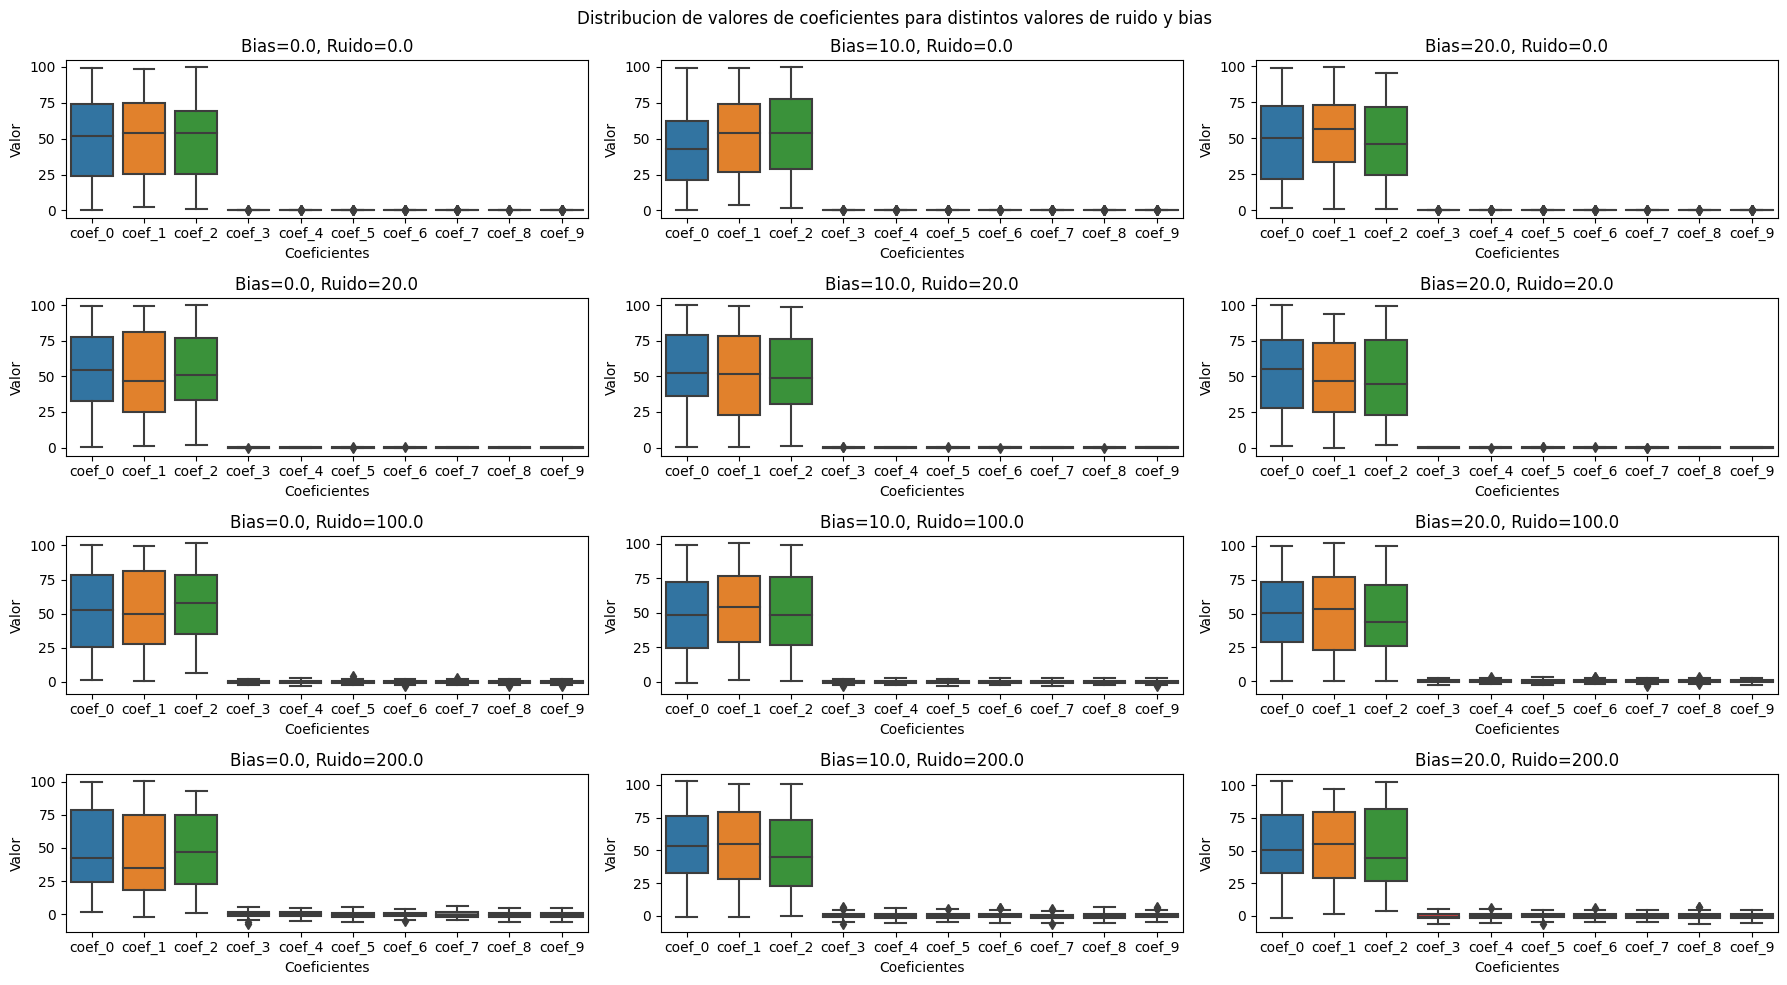

In [21]:
bias_values = results['bias'].unique()
noise_values = results['noise'].unique()

fig, axes = plt.subplots(len(noise_values), len(bias_values), figsize=(18, 10))

for i, noise in enumerate(noise_values):
    for j, bias in enumerate(bias_values):
        compare = results.loc[(results.bias == bias) &
                              (results.noise == noise)]
        coef_columns = [f'coef_{k}' for k in range(n_features)]
        sns.boxplot(data=compare[coef_columns], ax=axes[i, j])

        axes[i, j].set_title(f"Bias={bias}, Ruido={noise}")
        axes[i, j].set_xlabel("Coeficientes")
        axes[i, j].set_ylabel("Valor")

fig.suptitle(
    "Distribucion de valores de coeficientes para distintos valores de ruido y bias")
plt.tight_layout()
plt.show()

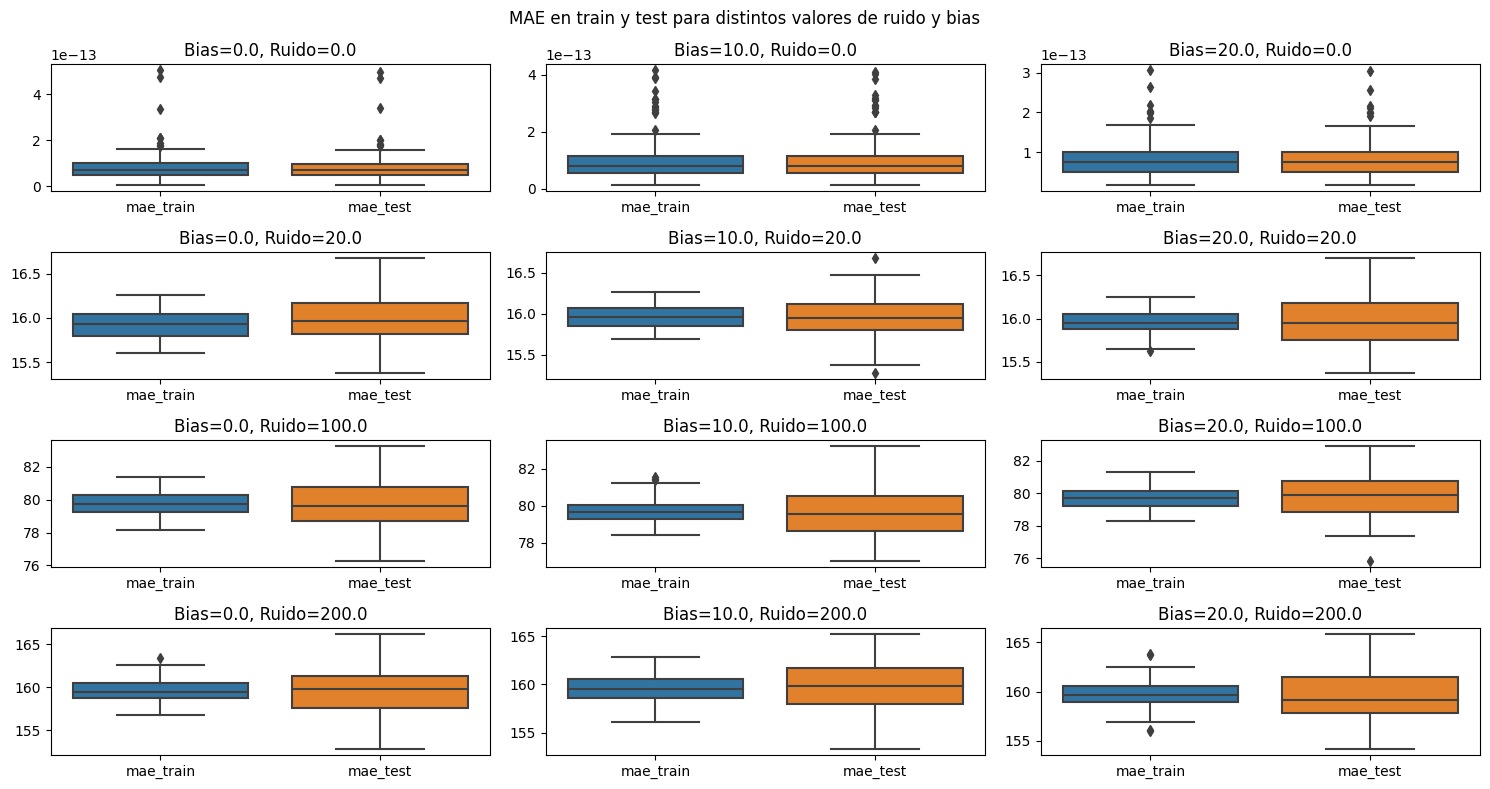

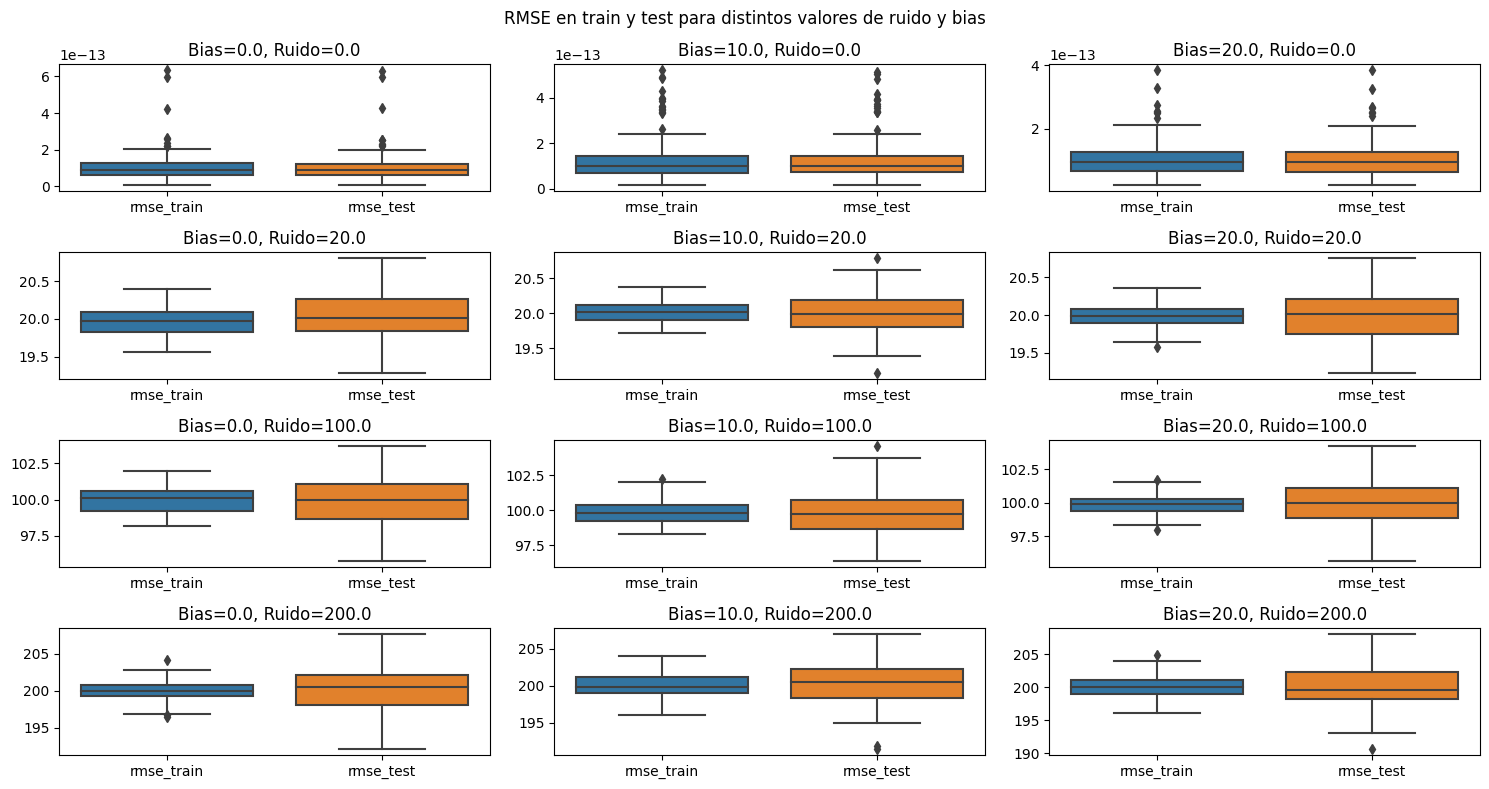

In [22]:
bias_values = results['bias'].unique()
noise_values = results['noise'].unique()

fig, axes = plt.subplots(len(noise_values), len(bias_values), figsize=(15, 8))
for i, noise in enumerate(noise_values):
    for j, bias in enumerate(bias_values):
        compare = results.loc[(results.bias == bias) & (results.noise == noise)]
        coef_columns = ['mae_train', 'mae_test']
        sns.boxplot(data=compare[coef_columns], ax=axes[i, j])
        axes[i, j].set_title(f"Bias={bias}, Ruido={noise}")

fig.suptitle("MAE en train y test para distintos valores de ruido y bias")
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(len(noise_values), len(bias_values), figsize=(15, 8))
for i, noise in enumerate(noise_values):
    for j, bias in enumerate(bias_values):
        compare = results.loc[(results.bias == bias) & (results.noise == noise)]
        coef_columns = ['rmse_train', 'rmse_test']
        sns.boxplot(data=compare[coef_columns], ax=axes[i, j])
        axes[i, j].set_title(f"Bias={bias}, Ruido={noise}")

fig.suptitle("RMSE en train y test para distintos valores de ruido y bias")
plt.tight_layout()
plt.show()

In [23]:
bias_values = results['bias'].unique()
noise_values = results['noise'].unique()

error_avg = pd.DataFrame(columns=['bias', 'noise', 'rmse_train_avg', 'rmse_test_avg', 'mae_train_avg', 'mae_test_avg'])

for bias in bias_values:
    for noise in noise_values:
        subset = results[(results['bias'] == bias) & (results['noise'] == noise)]
        rmse_train_avg = subset['rmse_train'].mean()
        rmse_test_avg = subset['rmse_test'].mean()
        mae_train_avg = subset['mae_train'].mean()
        mae_test_avg = subset['mae_test'].mean()
        
        ret = {
            'bias': bias,
            'noise': noise,
            'rmse_train_avg': rmse_train_avg,
            'rmse_test_avg': rmse_test_avg,
            'mae_train_avg': mae_train_avg,
            'mae_test_avg': mae_test_avg
            }
        error_avg.loc[len(error_avg)] = ret

error_avg.head()

,bias,noise,rmse_train_avg,rmse_test_avg,mae_train_avg,mae_test_avg
0,0.0,0.0,1.124917e-13,1.122339e-13,8.949481e-14,8.915339e-14
1,0.0,20.0,1.997112e+01,2.005234e+01,1.593100e+01,1.599834e+01
2,0.0,100.0,9.993429e+01,9.985427e+01,7.973754e+01,7.964527e+01
3,0.0,200.0,1.999746e+02,2.001917e+02,1.595528e+02,1.594817e+02
4,10.0,0.0,1.381819e-13,1.376506e-13,1.100456e-13,1.095644e-13


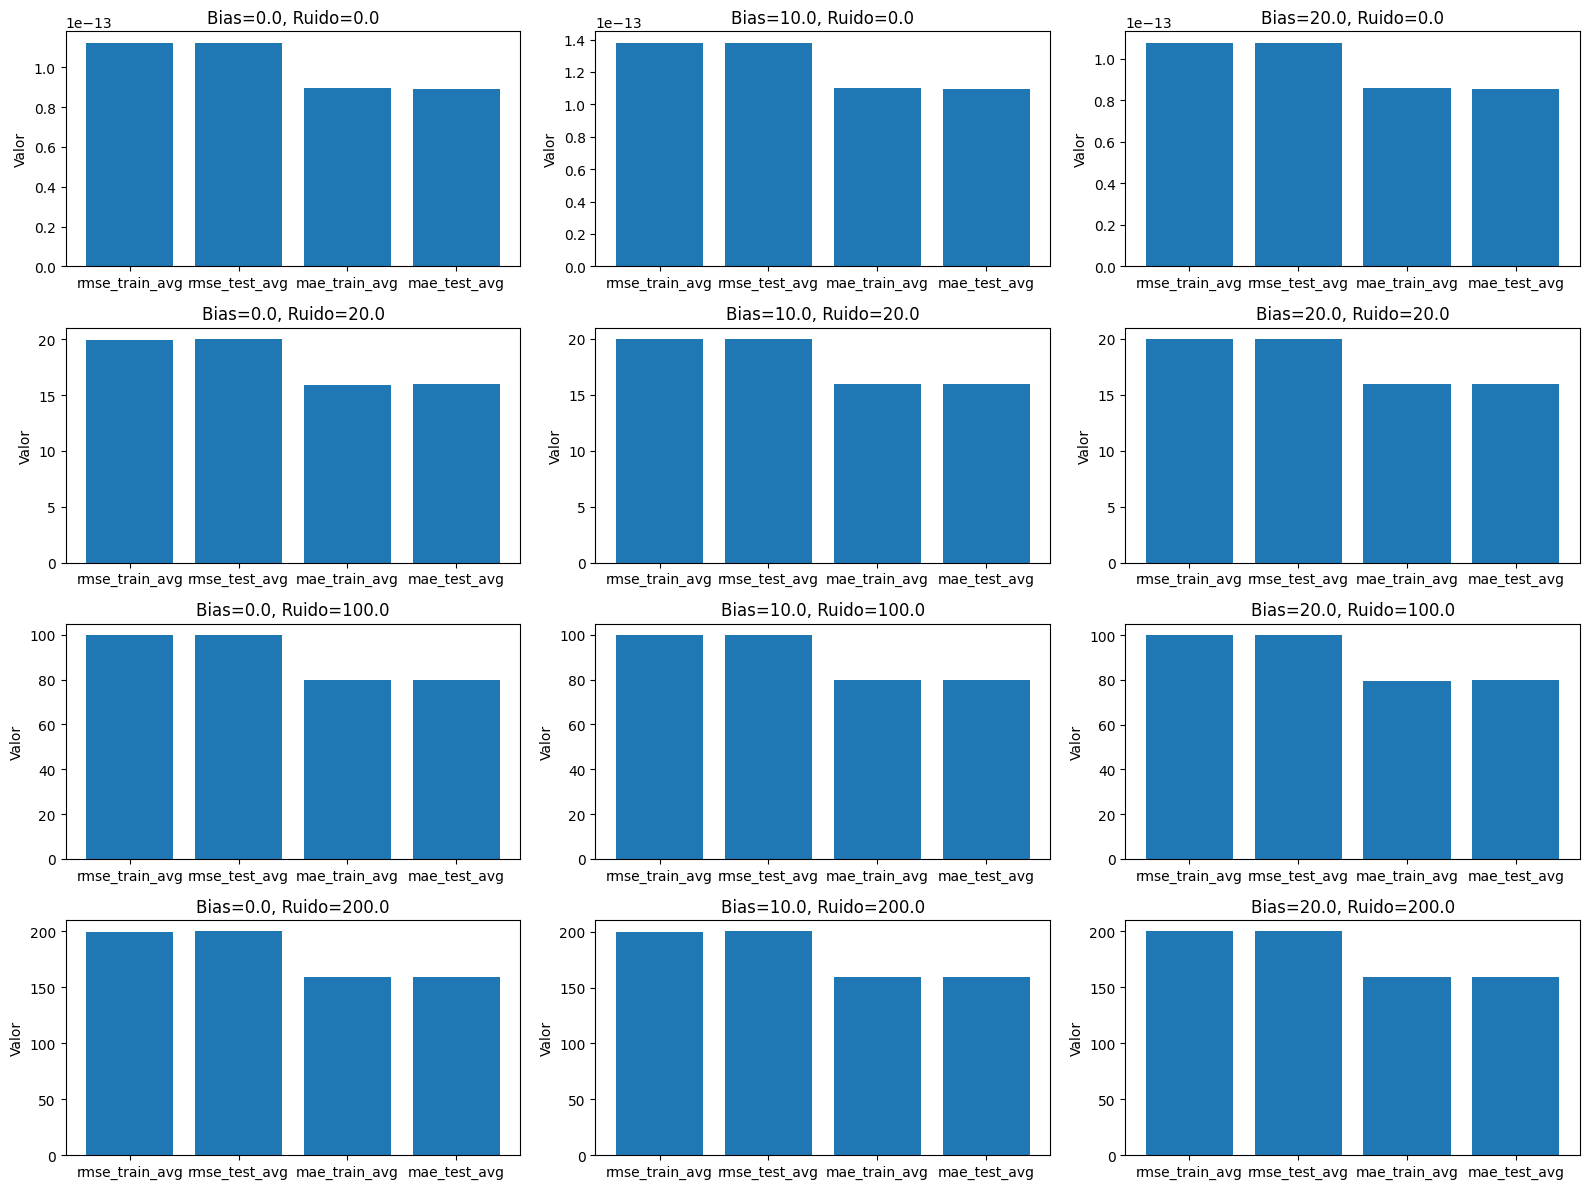

In [24]:
error_columns = ['rmse_train_avg', 'rmse_test_avg', 'mae_train_avg', 'mae_test_avg']
fig, axes = plt.subplots(len(noise_values), len(bias_values), figsize=(16, 12))

for i, noise in enumerate(noise_values):
    for j, bias in enumerate(bias_values):
        error = error_avg[(error_avg['bias'] == bias) & (error_avg['noise'] == noise)].drop(['bias','noise'],axis=1)
        x_labels = error.columns.tolist()
        values = error.iloc[0].tolist()
        axes[i, j].bar(x_labels, values)
        axes[i, j].set_title(f"Bias={bias}, Ruido={noise}")
        axes[i, j].set_ylabel("Valor")
        axes[i, j].tick_params(axis='x')
       
plt.tight_layout()
plt.show()


### Conclusion:

Como se puede observar en el primer daiagrama de cajas, los coeficientes de las variables no informativas tienden a tener valores cercanos a cero con una varianza relativamente baja. Al estar cerca de cero, significa que el modelo practicamente esta anulando las variables correspondientes a dichos coeficientes que son las no informativas. Es decir que las variables no están contribuyendo significativamente a la predicción del objetivo. 

Por otro lado, a medida que aumenta el nivel de ruido en los datos la varianza de los coeficientes de las variables no informativas tiende a aumentar. Por lo tanto las variables no informativas tienen cada vez mas influencia sobre la variable objetivo a medida que el ruido aumenta. La varianza mas alta puede indica tambien una mayor variabilidad en como se ajustan estas variables en diferentes iteraciones del modelo debido a la aleatoriedad introducida por el ruido.

Es de esperar entonces que a mayor ruido, el error (RMSE y MAE) tienda a aumentar. Esto se comprueba en el ultimo diagrama de columna donde se comparan los errores para distintas combinaciones de ruido y bias. Por su parte, aumentar el bias de los datos no parece tener efecto sobre el error final o los valores de los coeficientes.

<br/><br/>
A continuacion se utiliza el test de hipotesis para mostrar la influencia de los coeficientes del modelo sobrdde la variable objetivo:

***Hipotesis nula (H0)***: Los coeficientes de las variables no informativas no tienen un efecto significativo en el modelo. Es decir $H0: \mu_\beta ≈ 0$.  
***Hipotesis alternativa (H1)***: Los coeficientes de las variables no informativas tienen un efecto significativo en el modelo. Es decir $H1: |\mu_\beta| > 0$.

In [25]:
from scipy import stats

alpha = 0.05 # Probabilidad de rechazar H0 cuando es verdadera

for coef_idx in range(n_features):
    coef_column = f'coef_{coef_idx}'
    coef_values = results[coef_column]
    
    t_statistic, p_value = stats.ttest_1samp(coef_values, popmean=0)  # Realizar la prueba de hipótesis
    
    if p_value < alpha:
        print(f"El coeficiente {coef_column} tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.")
    else:
        print(f"El coeficiente {coef_column} no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.")


El coeficiente coef_0 tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_1 tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_2 tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_3 no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_4 no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_5 no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_6 no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_7 tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficiente coef_8 no tiene un efecto significativo en el modelo, con un nivel de significancia alpha=0.05.
El coeficient

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [26]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

#### Ejemplo para un solo conjunto de datos

In [27]:
data = generate_dataset(
    n_samples=10000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.5,
    bias=10,
    output='dataframe'
)

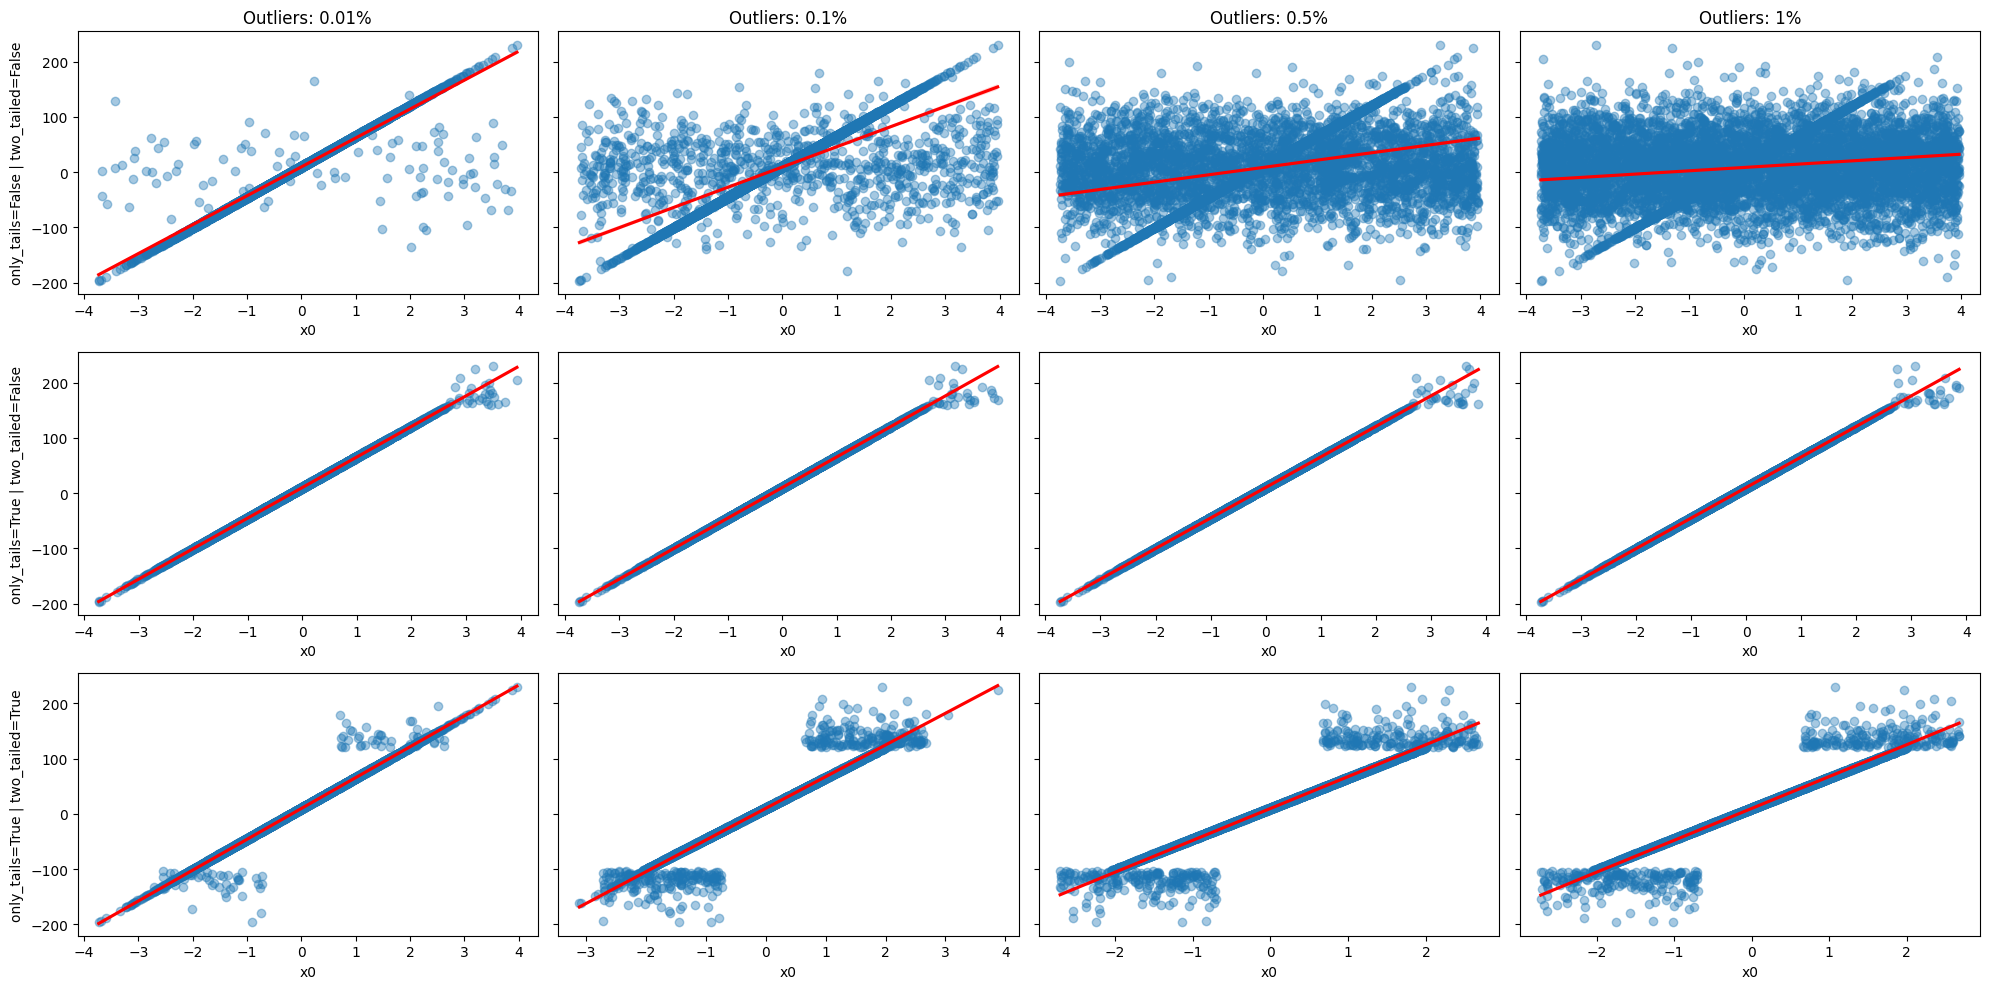

In [28]:
outliers_percentage_list = [.01, .1, .5, 1]
only_tails_list = [False, True, True]
two_tailed_list = [False, False, True]

fig, axes = plt.subplots(len(only_tails_list), len(
    outliers_percentage_list), figsize=(20, 10), sharey=True)
for i in range(len(only_tails_list)):
    for j, outliers_percentage in enumerate(outliers_percentage_list):
        data_outliers = generate_outliers(
            df=data,
            columns=None,
            percentage=outliers_percentage,
            extreme_outliers=False,
            only_tails=only_tails_list[i],
            two_tailed=two_tailed_list[i],
        )
        sns.regplot(
            x='x0',
            y='target',
            data=data_outliers,
            ax=axes[i, j],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95
        )
        if(j==0):        
            axes[i, j].set_ylabel("only_tails={} | two_tailed={}".format(only_tails_list[i],two_tailed_list[i]))
        else:
            axes[i, j].set_ylabel("")


for j, outliers_percentage in enumerate(outliers_percentage_list):
    axes[0, j].set_title(f'Outliers: {outliers_percentage}%')
plt.tight_layout()
plt.show()

In [29]:
data_outliers = generate_outliers(
    df=data,
    columns=None,
    percentage=.1,
    extreme_outliers=False,
    only_tails=False
)

In [30]:
# Dividir datos
X = data_outliers.drop(columns=['target'])
y = data_outliers['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
print("X_train: {} | X_test: {} | y_train: {} | y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))


X_train: (8000, 1) | X_test: (2000, 1) | y_train: (8000,) | y_test: (2000,)


In [31]:
# Regresión Lineal Simple
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train);

# Regresión de Huber
huber_model = HuberRegressor(fit_intercept=True)
huber_model.fit(X_train, y_train);

# Regresión Ridge
ridge_model = RidgeCV(fit_intercept=True)
ridge_model.fit(X_train, y_train);

In [32]:
y_pred_linear = linear_model.predict(X_test)
y_pred_huber = huber_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

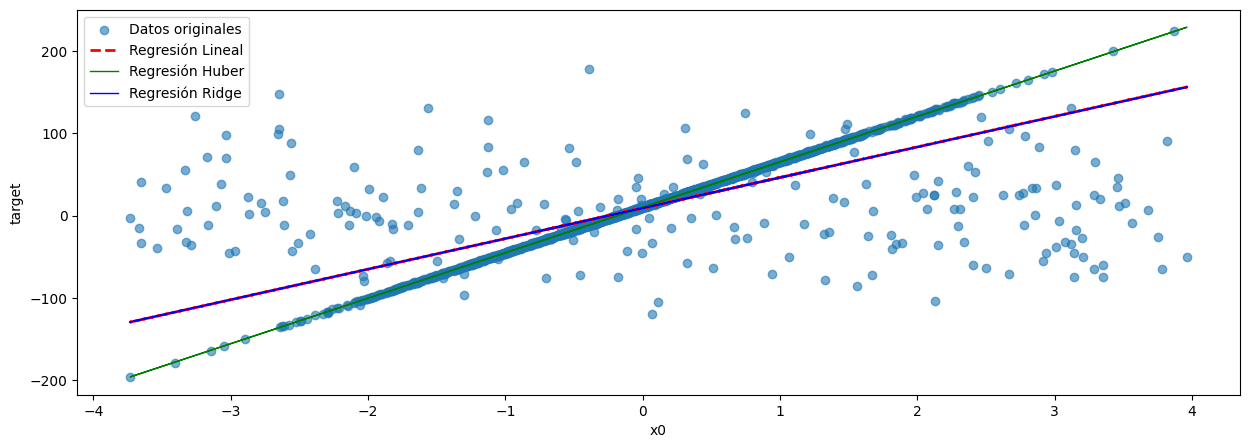

In [33]:
predictions_df = pd.DataFrame({'Actual': y_test,
                               'Linear': y_pred_linear,
                               'Huber': y_pred_huber,
                               'Ridge': y_pred_ridge})

plt.figure(figsize=(15, 5))
plt.scatter(X_test, y_test, label='Datos originales', alpha=0.6)
plt.plot(X_test, y_pred_linear, label='Regresión Lineal', color='red', linestyle='dashed', linewidth=2)
plt.plot(X_test, y_pred_huber, label='Regresión Huber', color='green', linewidth=1)
plt.plot(X_test, y_pred_ridge, label='Regresión Ridge', color='blue', linewidth=1)
plt.xlabel('x0')
plt.ylabel('target')
plt.legend()
plt.show()

### Simulacion

In [34]:
# Generar datos constantes para todas las simulaciones.
# De esta forma las variaciones se deberan solo a los outliers y de la division en train y test.
data = generate_dataset(
    n_samples=10000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.5,
    bias=10,
    output='dataframe'
)

n_exp = 100 # n_exp = 100
outliers_percentage_list = [.01, .02, .05, .1]
# only_tails_list = [False, True, True]
# two_tailed_list = [False, False, True]

In [35]:
results = pd.DataFrame(
    columns=['outliers_percentage','model', 'rmse_train', 'rmse_test', 'mae_train', 'mae_test']
)
results_only_tails = results.copy(deep=True)

for _ in tqdm(range(n_exp)):
    # for i in range(len(only_tails_list)):
    for outliers_percentage in outliers_percentage_list:

        data_outliers = generate_outliers(
            df=data,
            columns=None,
            percentage=outliers_percentage,
            extreme_outliers=True,
            only_tails=False,   # only_tails=only_tails_list[i],
            two_tailed=False    # two_tailed=two_tailed_list[i],
        )
        
        # Dividir datos
        X = data.drop(columns=['target'])
        y = data['target']
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2)

        models = []
        moodel_name = []
        # Regresión Lineal Simple
        linear_model = LinearRegression(fit_intercept=True)
        linear_model.fit(X_train, y_train);
        models.append(linear_model)
        moodel_name.append('linear')

        # Regresión de Huber
        huber_model = HuberRegressor(fit_intercept=True)
        huber_model.fit(X_train, y_train);
        models.append(huber_model)
        moodel_name.append('hube')

        # Regresión Ridge
        ridge_model = RidgeCV(fit_intercept=True)
        ridge_model.fit(X_train, y_train);
        models.append(ridge_model)
        moodel_name.append('ridge')

        for model,name in zip(models,moodel_name):

            # Predicciones sobre train y test
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            ret = [outliers_percentage, name]
            ret.append(rmse(y_train, y_pred_train))
            ret.append(rmse(y_test, y_pred_test))
            ret.append(mae(y_train, y_pred_train))
            ret.append(mae(y_test, y_pred_test))

            results.loc[len(results)] = ret

results.head()

100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


,outliers_percentage,model,rmse_train,rmse_test,mae_train,mae_test
0,0.01,linear,0.498664,0.494592,0.397326,0.392367
1,0.01,hube,0.498671,0.494505,0.397318,0.392297
2,0.01,ridge,0.498664,0.494598,0.397328,0.392374
3,0.02,linear,0.495973,0.505356,0.395668,0.399120
4,0.02,hube,0.495975,0.505285,0.395659,0.399059


In [36]:
# Errores promedios para cada combinación de outliers_percentage y model
error_avg = results.groupby(['outliers_percentage', 'model']).mean().reset_index()
error_avg.rename(columns={
    'rmse_train': 'rmse_train_avg',
    'rmse_test': 'rmse_test_avg',
    'mae_train': 'mae_train_avg',
    'mae_test': 'mae_test_avg'
}, inplace=True)

error_avg.head()

,outliers_percentage,model,rmse_train_avg,rmse_test_avg,mae_train_avg,mae_test_avg
0,0.01,hube,0.498008,0.497188,0.396433,0.395819
1,0.01,linear,0.497999,0.497185,0.396446,0.395813
2,0.01,ridge,0.497999,0.497185,0.396448,0.395814
3,0.02,hube,0.497841,0.497883,0.396294,0.396377
4,0.02,linear,0.497833,0.497875,0.396307,0.396373


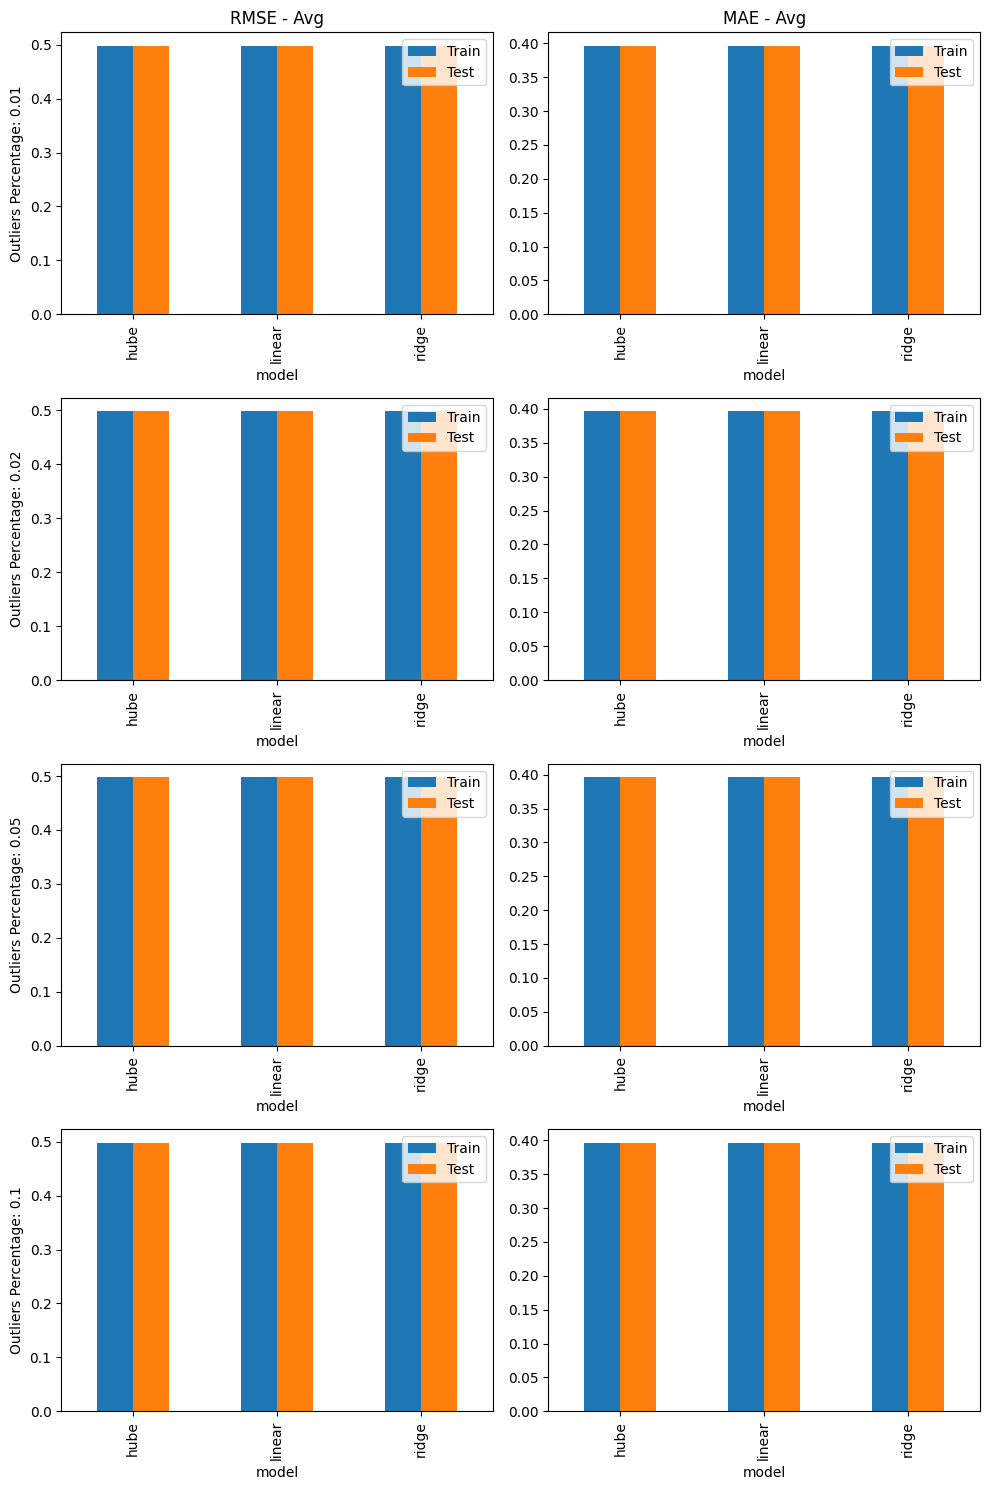

In [37]:
fig, axes = plt.subplots(nrows=len(error_avg['outliers_percentage'].unique()), ncols=2, figsize=(10, 15))

for i, outliers_percentage in enumerate(error_avg['outliers_percentage'].unique()):
    data = error_avg[error_avg['outliers_percentage'] == outliers_percentage]
    data.plot(kind='bar', x='model', y=['rmse_train_avg', 'rmse_test_avg'], ax=axes[i, 0])
    data.plot(kind='bar', x='model', y=['mae_train_avg', 'mae_test_avg'], ax=axes[i, 1])

    axes[i, 0].set_ylabel(f'Outliers Percentage: {outliers_percentage}')

for ax in axes.flat:
    ax.legend(['Train', 'Test'])

axes[0, 0].set_title("RMSE - Avg")
axes[0, 1].set_title("MAE - Avg")

plt.tight_layout()
plt.show()


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [38]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

         x0      target
0 -1.440587 -132.712020
1  0.432232   39.748481
2  2.302227  212.118077
3 -0.548141  -50.630972
4 -0.184188  -17.148638


<Axes: xlabel='x0', ylabel='target'>

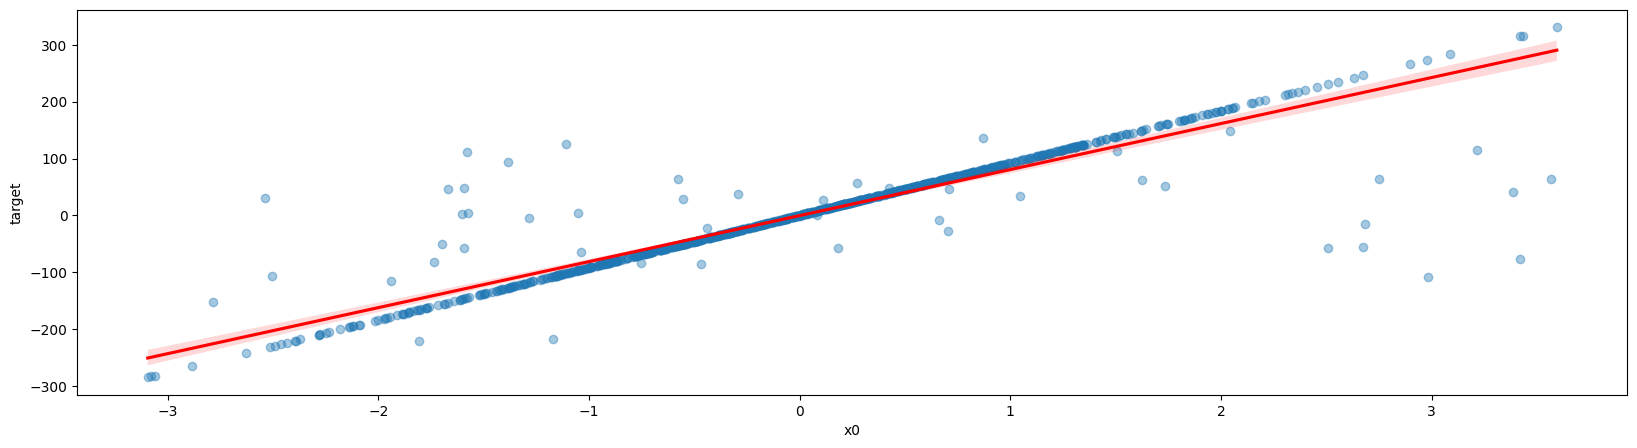

In [39]:
# Crear dataset
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.08,
    bias=0,
    output='dataframe'
)

data = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.05,
    extreme_outliers=False,
    only_tails=False,
)

print(data.head())

fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.regplot(x=data['x0'],
            y=data['target'],
            data=data,
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)

In [40]:
def get_mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)


def GD(X_train: np.ndarray, y_train: np.ndarray, 
                     X_val: np.ndarray, y_val: np.ndarray, 
                     theta: np.ndarray, epoch: int = 100, 
                     alpha: float = 0.01, tol: float = 0.01) -> np.ndarray:
    flag_break_tol = False
    err_train = []
    err_val = []
    N = len(y_train)

    for e in range(epoch):

        # Mezclo los datos
        idx_shuffle = np.random.permutation(N)
        X_train = X_train[idx_shuffle]
        y_train = y_train[idx_shuffle]
        
        # Calculo el gradiente
        grad = gradient(X_train,y_train,theta)

        # Calculo los nuevos pesos y verifico si hay que salir por tolerancia
        theta_new = theta - alpha * grad
        if (np.all(((np.abs(theta-theta_new))/theta) < tol)):
            flag_break_tol = True

        # Actualizo los pesos y calculo prediccion y error
        theta = theta_new
        y_hat_train = X_train.dot(theta)
        err_train.append(get_mse(y_train, y_hat_train))
        y_hat_val = X_val.dot(theta)
        err_val.append(get_mse(y_val, y_hat_val))

        if (flag_break_tol):
            break

    return theta, err_train, err_val

In [41]:
# Dividir datos
X = np.column_stack((np.ones(len(data['x0'])), data['x0']))
y = np.array(data['target'])

X_train, X_val, _, y_train, y_val, _ = data_split(
    X, y, val_size=0.2, test_size=0, shuffle=True)
print("X_train: {} | X_val: {} | y_train: {} | y_val: {}".format(
    X_train.shape, X_val.shape, y_train.shape, y_val.shape))

X_train: (800, 2) | X_val: (200, 2) | y_train: (800,) | y_val: (200,)


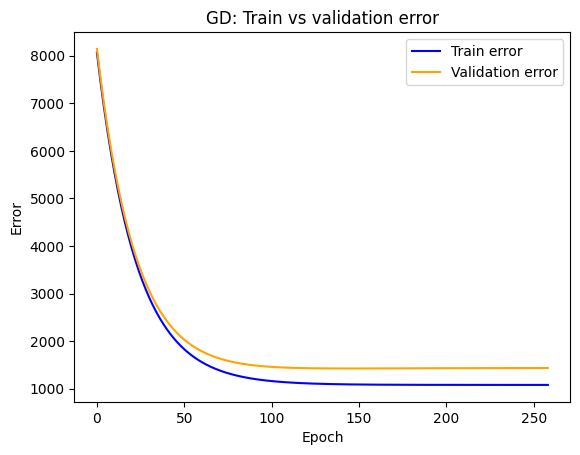

In [42]:
# Hiperparametros
alpha = 0.01
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

# Obtener parametros
theta, err_train, err_val = GD(
    X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)


plt.plot(err_train, color='blue', label="Train error")
plt.plot(err_val, color='orange', label="Validation error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("GD: Train vs validation error")
plt.legend()
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [43]:
def SGD(X_train: np.ndarray, y_train: np.ndarray, 
                     X_val: np.ndarray, y_val: np.ndarray, 
                     theta: np.ndarray, epoch: int = 100, 
                     alpha: float = 0.01, tol: float = 0.01) -> np.ndarray:
    flag_break_tol = False
    err_train = []
    err_val = []
    N = len(y_train)
    theta_old = np.NINF
    
    for e in range(epoch):
        
        # Mezclo los datos
        idx_shuffle = np.random.permutation(N)
        X_train = X_train[idx_shuffle]
        y_train = y_train[idx_shuffle]
        
        for (x,y) in zip(X_train,y_train):
            
            # Calculo prediccion, error y gradiente
            y_hat = x.dot(theta)
            err_sample = y - y_hat
            grad = (-2 / N) * x.T.dot(err_sample)
            
            # Acutalizo pesos
            theta = theta - alpha * grad
            
        if (np.all(((np.abs(theta_old-theta))/theta) < tol)):
            flag_break_tol = True
        theta_old = theta

        y_hat_train = X_train.dot(theta)
        err_train.append(get_mse(y_train, y_hat_train))
        y_hat_val = X_val.dot(theta)
        err_val.append(get_mse(y_val, y_hat_val))

        if (flag_break_tol):
            break

    return theta, err_train, err_val

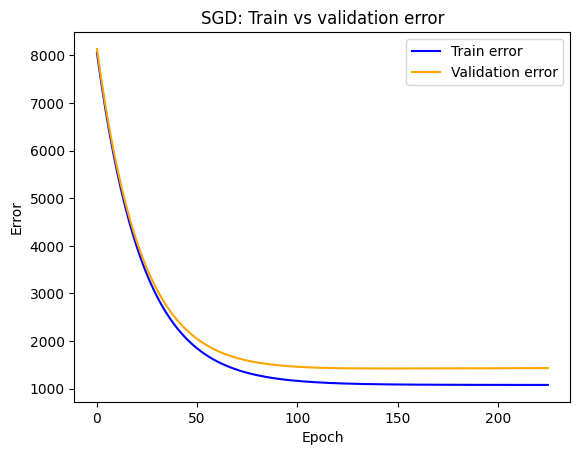

In [44]:
# Hiperparametros
alpha = 0.01
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

# Obtener parametros
theta, err_train, err_val = SGD(
    X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)


plt.plot(err_train, color='blue', label="Train error")
plt.plot(err_val, color='orange', label="Validation error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("SGD: Train vs validation error")
plt.legend()
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

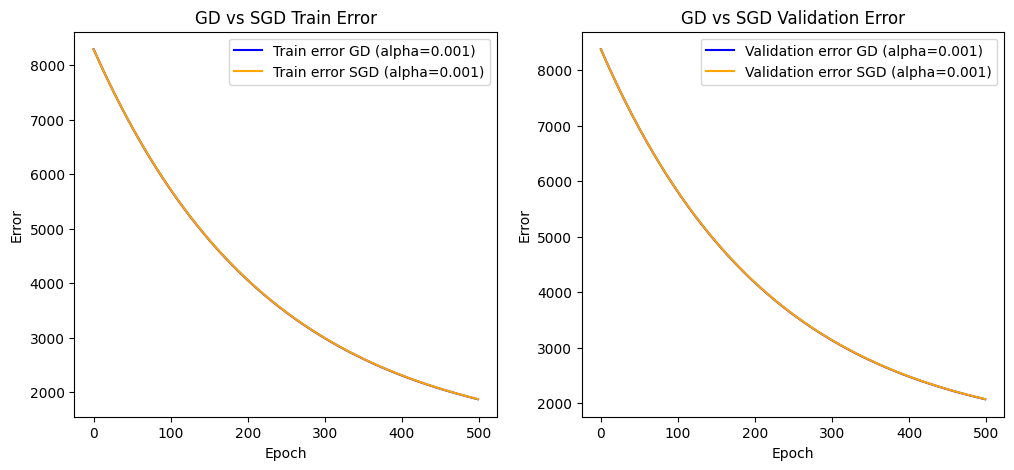

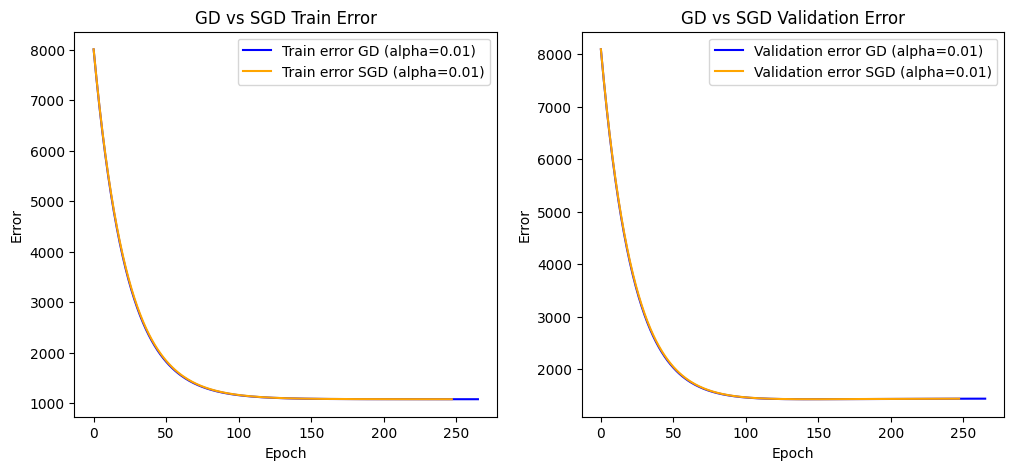

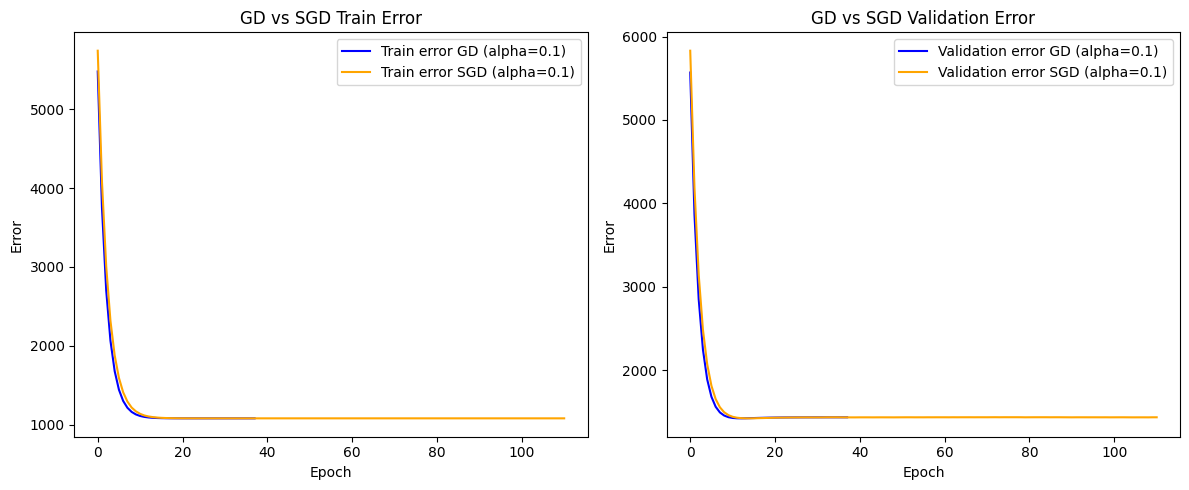

In [45]:
# Hiperparametros
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

for alpha in [0.001,0.01,0.1]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Obtener parametros
    gd_theta, gd_err_train, gd_err_val = GD(
        X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)
    sgd_theta, sgd_err_train, sgd_err_val = SGD(
        X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)
    
    axes[0].plot(gd_err_train, color='blue', label=f"Train error GD (alpha={alpha})")
    axes[0].plot(sgd_err_train, color='orange', label=f"Train error SGD (alpha={alpha})")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Error")
    axes[0].set_title("GD vs SGD Train Error")
    axes[0].legend()

    axes[1].plot(gd_err_val, color='blue', label=f"Validation error GD (alpha={alpha})")
    axes[1].plot(sgd_err_val, color='orange', label=f"Validation error SGD (alpha={alpha})")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Error")
    axes[1].set_title("GD vs SGD Validation Error")
    axes[1].legend()

plt.tight_layout()
plt.show()


#### Conclusiones

En general, GD suele convergir de manera más rápida que SGD ya que utiliza todos los datos de train al mismo tiempo en cada epoca para actualizar el valor de los parametros. Por su parte, SGD utiliza una muestra aleatoria en cada iteración, lo que puede hacer que la convergencia sea más ruidosas y menos precisas. En el ejemplo estudiado no se observa este ruido en la convergencia del SGD y ambos metodos convergen practicamente de la misma forma. Esto puede deberse a la simplicidad del los datos utilizados en el ejemplo. En el último grafico donde se superponen las gráficas de SGD y GD vemos una pequeña mejora en la convergencia del GD respecto del SGD.

A su vez, la velocidad de convergencia más rápida de GD a menudo se logra a expensas de un alto consumo de memoria, ya que requiere almacenar todo el conjunto de datos en la memoria en cada paso. Es por esto que SGD es más eficiente en términos de memoria ya que solo necesita almacenar una pequeña muestra de datos en cada iteración

Por otro lado, se puede ver que en ambos algoritmos el error de validación converge a un valor un poco mayor que el error de train. Esto se debe al overfitting, que es cuando un modelo se ajusta demasiado a los datos de entrenamiento en lugar de generalizar a nuevos datos.

### Ejercicio 7

TBD